In [1]:
from libraries import MyDAQ
from libraries import functions as H
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx as dx
from scipy.signal import sawtooth, square
import libraries
from libraries import PMConverter
from scipy.fft import rfft, rfftfreq, irfft
import time
all_list = [H.RC_C, H.RCRC_CC, H.RLC_sC, H.RLC_sRC, H.RLC_pC, H.RLC_pRL, H.RL_R, H.CL_C, H.RC_R, H.RCRC_RR, H.RLC_sL, H.RLC_sRL, H.RLC_pL, H.RLC_pRC, H.RL_L, H.CL_L, H.RLC_sR, H.RLC_sLC, H.RLC_pR, H.RLC_pLC]

daq = MyDAQ()
daq.name = 'MyDAQ1'
daq.samplerate = 200000
read_channel = 'AI0'	
write_channel = 'AO0'

writeTask.start took 0.025121 seconds.


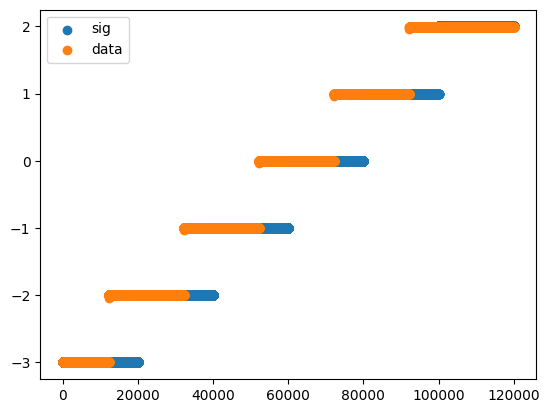

0
12272 data points are within 0.1 V of 6 V.
20000 data points are within 0.1 V of 6 V.
20000 data points are within 0.1 V of 6 V.
20000 data points are within 0.1 V of 6 V.
20000 data points are within 0.1 V of 6 V.
27728 data points are within 0.1 V of 6 V.
120000
120000


In [2]:
duration = 5
amplitude = 2
freq = 20000
phase = 0
_, signal = daq.generateWaveform('sine', daq.samplerate, freq, amplitude, phase, duration)
signal = []
for i in range(0, 6):
    for j in range(0, 20000):
        signal.append((i - 3))
data = daq.readwrite(np.array(signal), read_channel, write_channel)
plt.scatter(np.arange(len(signal)), signal, label='sig')
plt.scatter(np.arange(len(data)), data, label='data')
plt.legend()
plt.show()

print(len(signal) - len(data))
countt = 0
for i in range(0, 6):
    count = np.sum(np.abs(data - (i-3)) <= 0.1)
    countt += count
    print(f"{count} data points are within 0.1 V of 6 V.")
print(countt)
print(len(data))

In [3]:
PM = PMConverter()
daq = MyDAQ()

In [4]:
daq.name = 'MyDAQ1'
daq.samplerate = int(2e5)
read_channel = 'AI0'	
write_channel = 'AO0'
carrierFrequency = 2e4
sps = 2000
amplitude = 2

text = "Hi!"
binary = PM.text_to_binary(text)
fm_signal = PM.binary_to_pm(binary, fmType=1)

voltages = PM.pm_to_voltage_array(fm_signal, sps, f=carrierFrequency, fs=daq.samplerate, A=amplitude)


48000
writeTask.start took 0.021057 seconds.


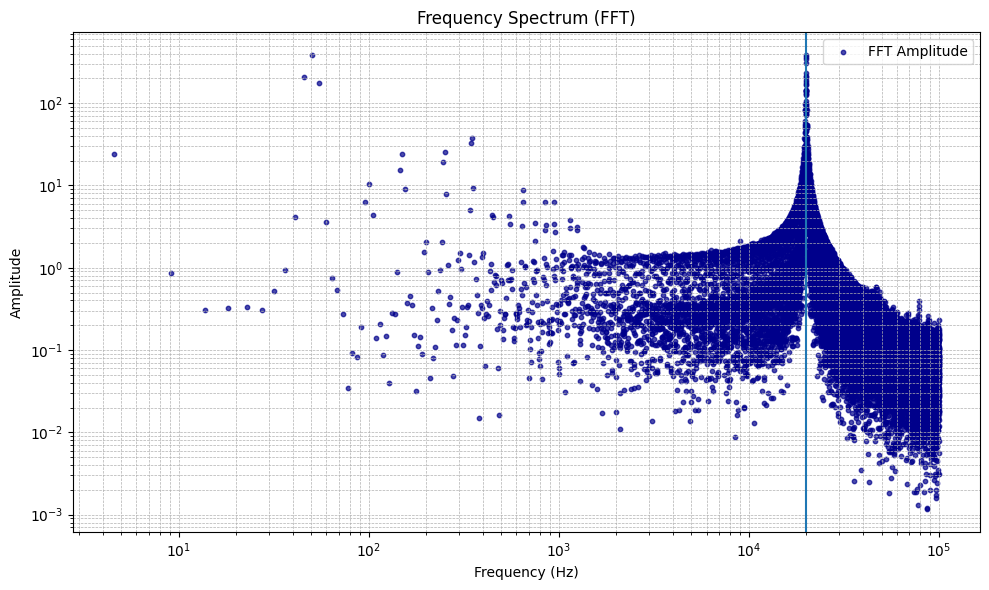

Recovered Binary: 01001000 01101001 00100001
Recovered Text: Hi!
21 24
Recovered Binary: 11111111 11111111 11111
Recovered Text: ÿÿ
[-0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505
 -0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505
 -0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505 -0.22876505
 -0.22876505 -0.22876505 -0.22876505]


In [8]:
print(len(voltages))
data = daq.readwrite(voltages, read_channel, write_channel)

window = np.hanning(len(data))
windowed_data = data * window
fft = np.fft.rfft(windowed_data)
freqs = np.fft.rfftfreq(len(data), 1 / daq.samplerate)
amplitude = np.abs(fft)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(freqs, amplitude, s=10, color='darkblue', alpha=0.7, label='FFT Amplitude')
plt.axvline(carrierFrequency)
plt.xscale('log')
plt.yscale('log')  # Optional: helps when amplitudes span multiple orders
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

binary_back = PM.pm_to_binary(fm_signal, fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)

_, amplitudes, phases = PM.retrieve_phases(data, daq.samplerate, sps, carrierFrequency)

print(len(phases), len(fm_signal))

binary_back = PM.pm_to_binary(phases, fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)

print(phases)


(48000,)
writeTask.start took 0.026923 seconds.
42616 42616 48000


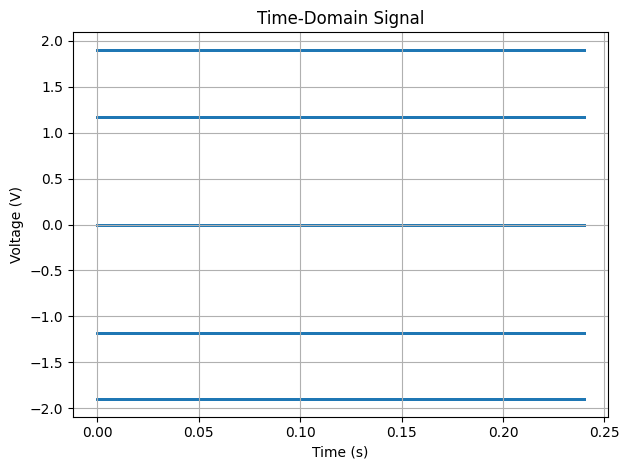

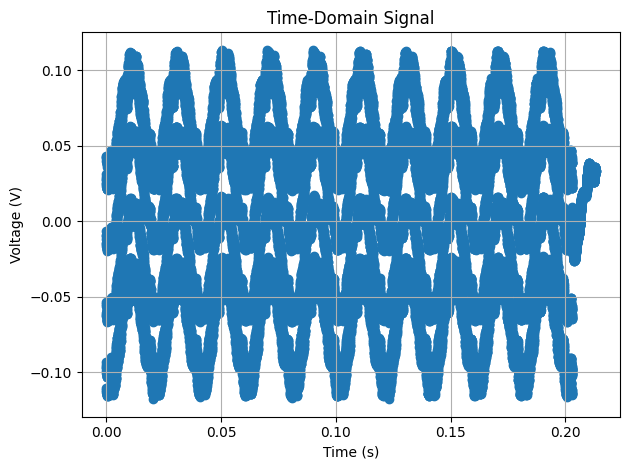

In [6]:
tArray = np.linspace(0, len(voltages) / daq.samplerate, len(voltages), endpoint=False)
print(voltages.shape)
data = daq.readwrite(voltages, read_channel, write_channel)
tArrayd = np.linspace(0, len(data) / daq.samplerate, len(data), endpoint=False)

print(len(tArrayd), len(data), len(voltages))

plt.scatter(tArray, voltages, s=1)  # s=1 to avoid huge dots
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.scatter(tArrayd, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

